In [1]:
from __future__ import print_function
import sys
import os
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import os
import glob

#matplotlib.rcParams['savefig.dpi'] = 2 * matplotlib.rcParams['savefig.dpi'] # larger image
#matplotlib.rcParams['figure.figsize']= (20.0, 10.0) # larger image


print("Python version:\n{}\n".format(sys.version))
print("matplotlib version: {}".format(matplotlib.__version__))
print("pandas version: {}".format(pd.__version__))
print("numpy version: {}".format(np.__version__))
print("seaborn version: {}".format(sns.__version__))

Python version:
3.7.8 | packaged by conda-forge | (default, Jul 31 2020, 02:25:08) 
[GCC 7.5.0]

matplotlib version: 3.3.3
pandas version: 1.1.4
numpy version: 1.19.4
seaborn version: 0.11.0


In [34]:
root_path = '../2-Run1'  # The path to the directory containing the systems

igbs = ['igb1', 'igb2', 'igb5', 'igb7', 'igb8']  # Each of the systems as named in their directory

ffs = ['ff94','ff96','ff98','ff99', 'ff99SB', 'ff99SBildn', 'ff99SBnmr', 'ff03.r1', 'ff14SB', \
       'ff14SBonlysc','ff14ipq','fb15','ff15ipq']  # The name of the state directories
# ffs = ['ff94', 'ff14SBonlysc']  # Test


filename_pattern = 'helicity.dat'  # The glob to match the data files to read

dfs = {}  # Mapping of system name to list of state DataFrames

igbff_all = []
for ff in ffs:
    #igbff_all = []
    for igb in igbs:
        direc=igb + '_'+ ff
        # For each system and state, grab all the data files that match the glob
        file_glob = os.path.join(root_path, direc, filename_pattern)
        files = glob.glob(file_glob)
        for f in files:
            # Read each into a file to be put into a dict
            df = pd.read_csv(f, sep=r'\s+', skiprows=2500, names=['Frame', 'Fraction helicity'])
            df[r'Time ($\mu$s)'] = df['Frame']/10000
            df['Helicity (%)'] = df['Fraction helicity']*100*33/31
            df['Mouving average']=pd.Series.rolling(df['Helicity (%)'],window=500,center=False).mean()
            df['igb'] = igb
            df['ff'] = ff
            df['ffigb'] = '{0} {1}'.format(ff, igb)
            df['igbff'] = '{0} {1}'.format(igb, ff)
            igbff_all.append(df)
df_total = pd.concat(igbff_all)
print(df_total.head())

   Frame  Fraction helicity  Time ($\mu$s)  Helicity (%)  Mouving average  \
0   2500              0.879         0.2500     93.570968              NaN   
1   2501              0.818         0.2501     87.077419              NaN   
2   2502              0.879         0.2502     93.570968              NaN   
3   2503              0.848         0.2503     90.270968              NaN   
4   2504              0.818         0.2504     87.077419              NaN   

    igb    ff      ffigb      igbff  
0  igb1  ff94  ff94 igb1  igb1 ff94  
1  igb1  ff94  ff94 igb1  igb1 ff94  
2  igb1  ff94  ff94 igb1  igb1 ff94  
3  igb1  ff94  ff94 igb1  igb1 ff94  
4  igb1  ff94  ff94 igb1  igb1 ff94  


(0.0, 5000.0)

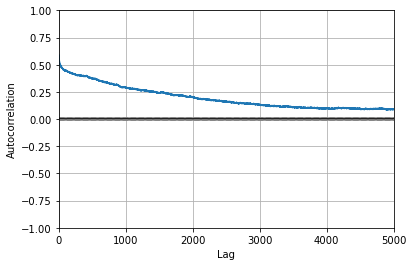

In [17]:
# fig, ax = plt.subplots(figsize=(5,4))
ax=pd.plotting.autocorrelation_plot(a)
ax.set_xlim([0, 5000])

In [18]:
from statsmodels.graphics.tsaplots import plot_acf

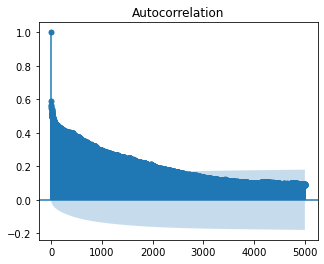

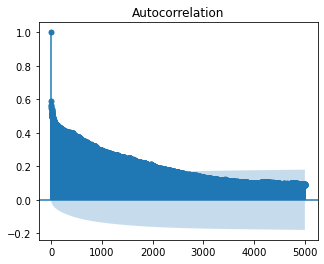

In [21]:
fig, ax = plt.subplots(figsize=(5,4))
plot_acf(a, lags=5000, ax=ax)


In [35]:
igbffs=[]
for j in range(0,13):
    for i in range(0,5):
        igbffs.append(igbs[i]+' '+ffs[j])
len(igbffs)

65

/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/statsmodels/graphics/utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:675: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/numpy/core/_asarray.py:83: UserWarning: Warning: converting a masked element to nan.
  return array(a, dtype, copy=False, order=order)
/home/el14718/Software/anaconda3_2019/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:675: RuntimeWarning: invalid value encountered in true_divide
  acf = avf[: nlags + 1] / avf[0]
/home/el14718/Software/anac

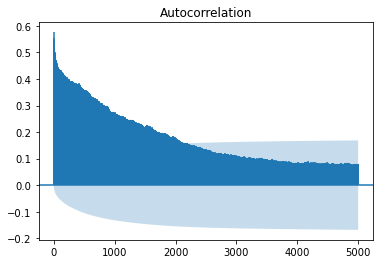

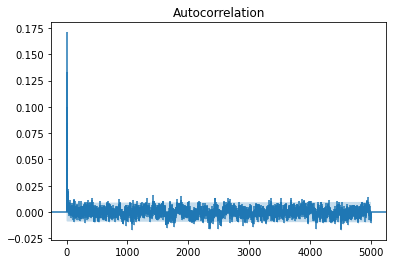

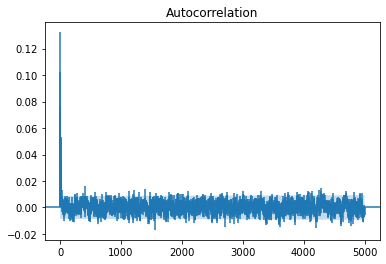

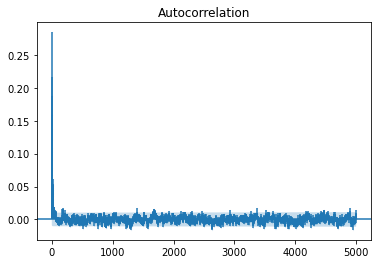

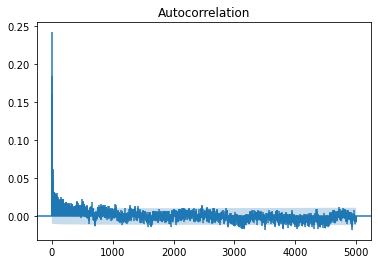

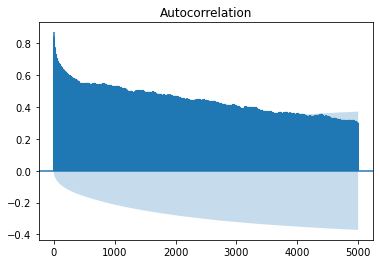

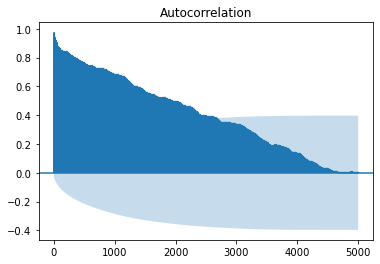

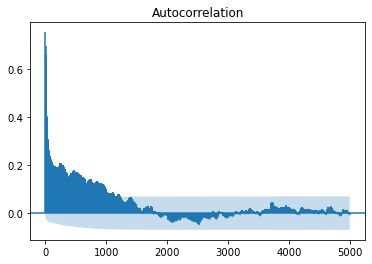

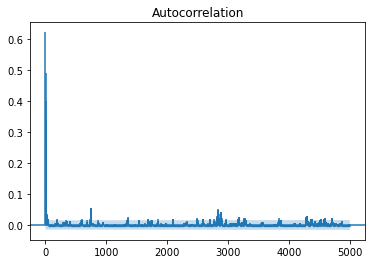

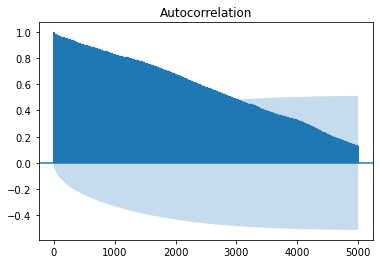

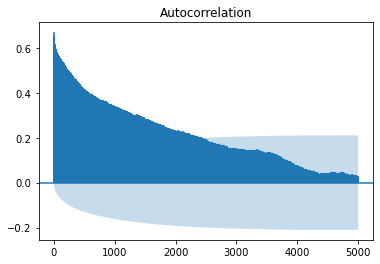

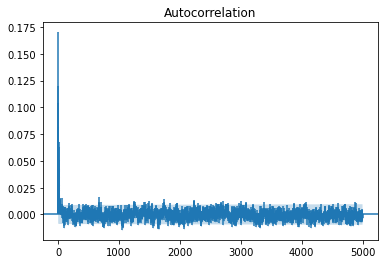

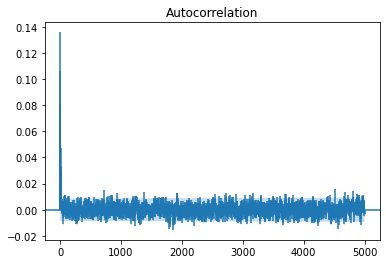

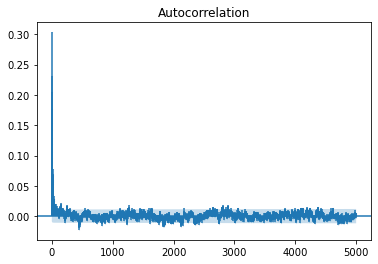

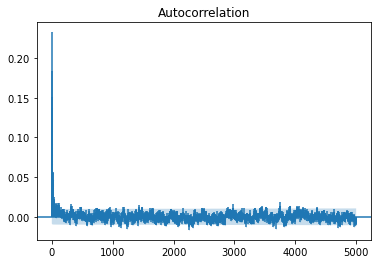

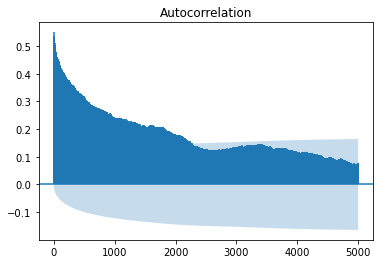

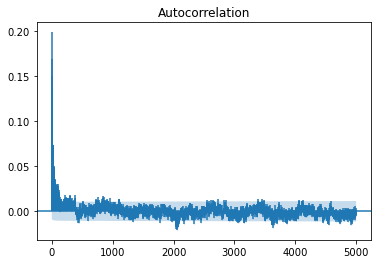

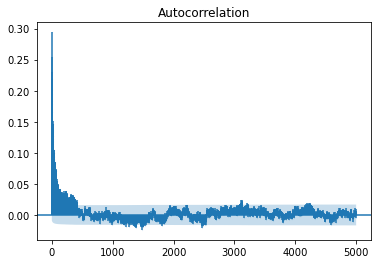

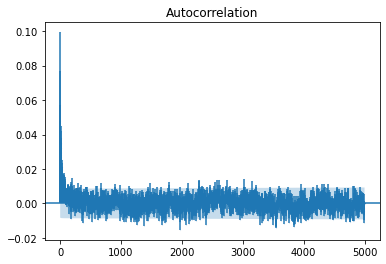

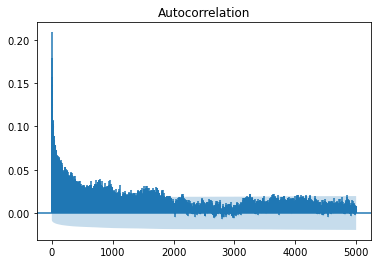

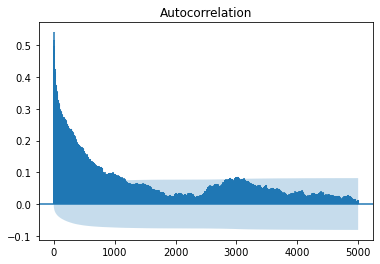

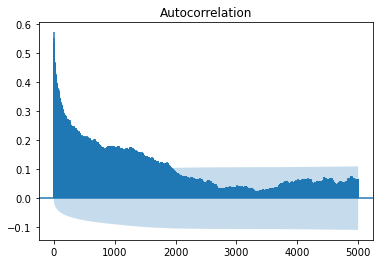

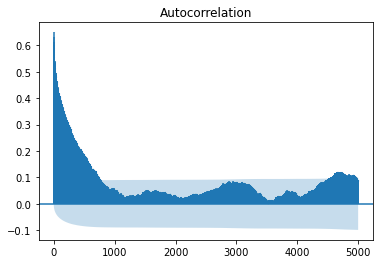

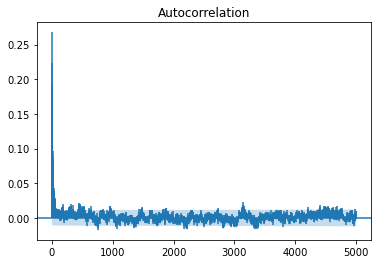

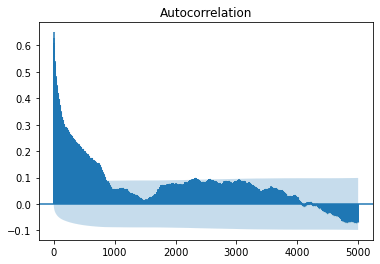

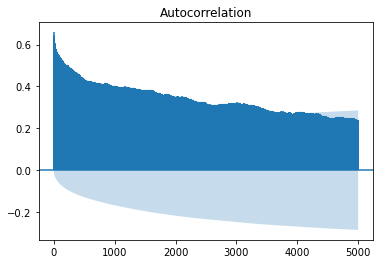

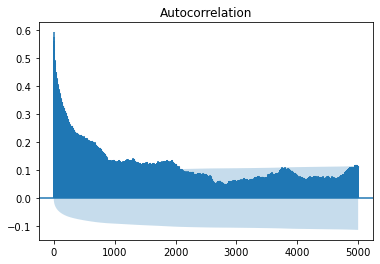

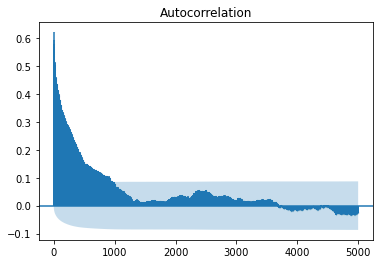

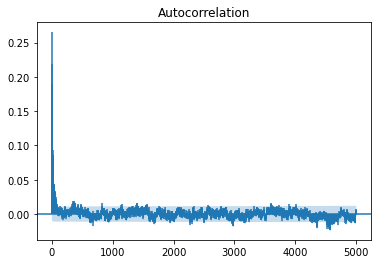

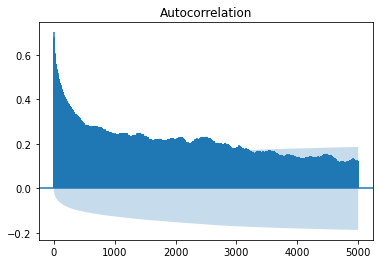

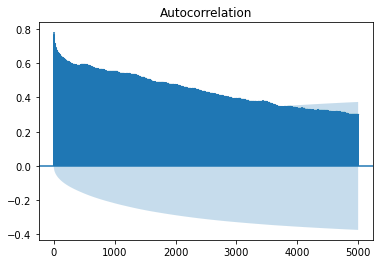

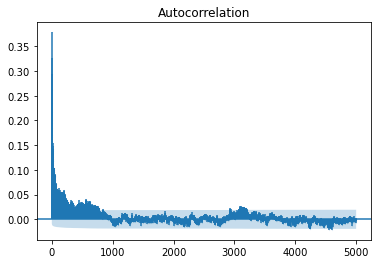

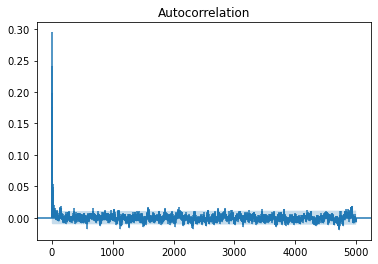

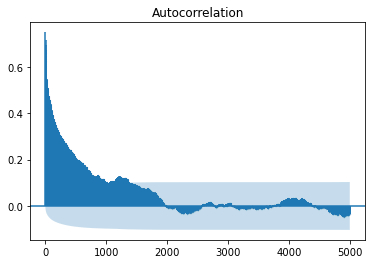

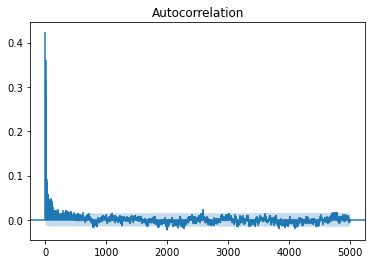

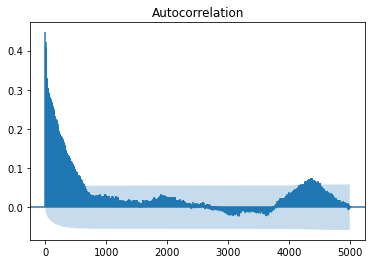

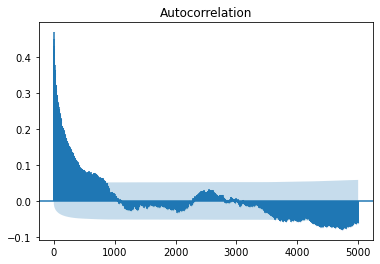

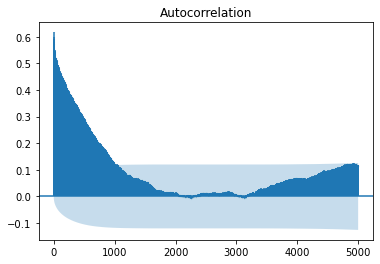

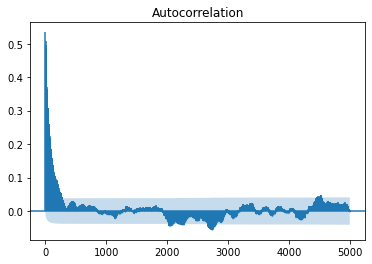

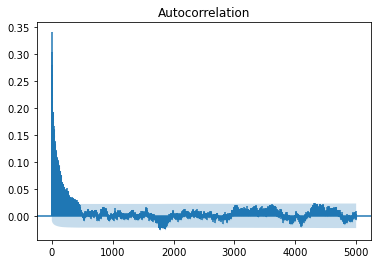

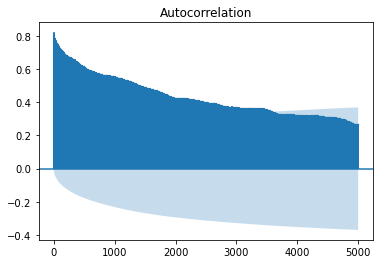

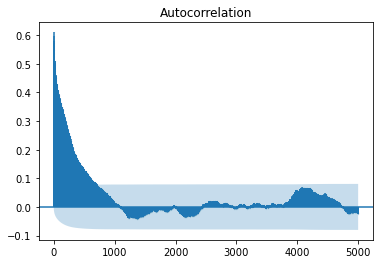

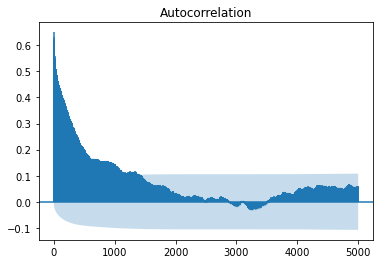

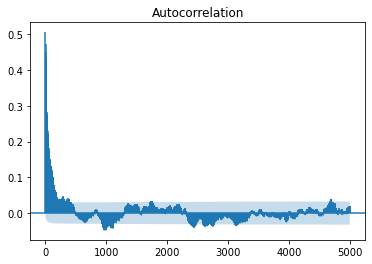

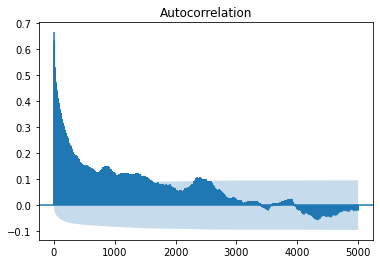

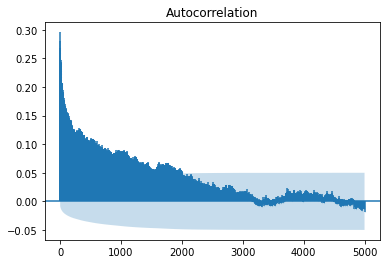

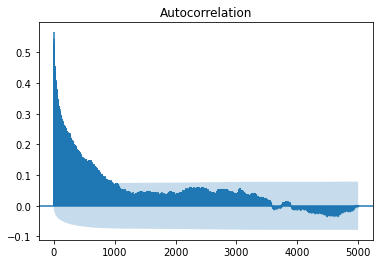

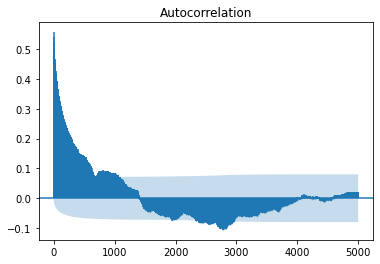

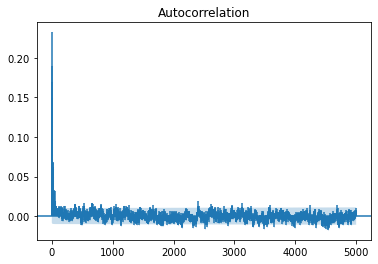

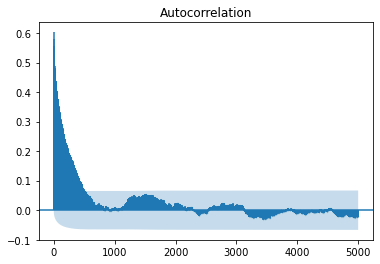

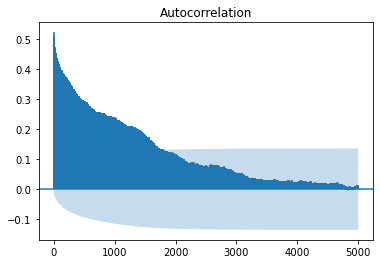

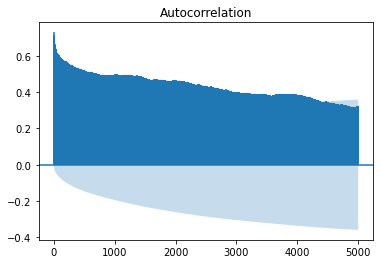

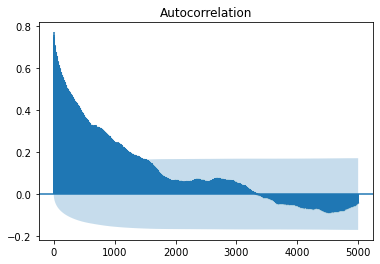

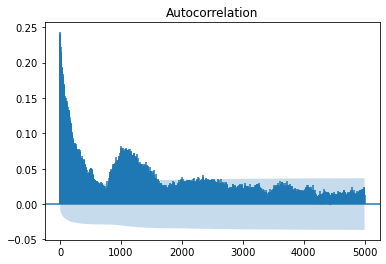

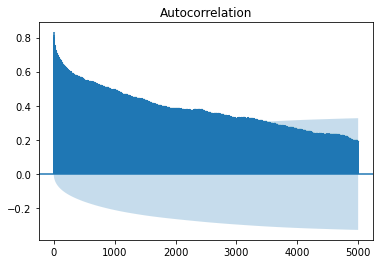

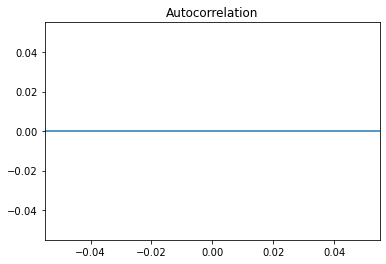

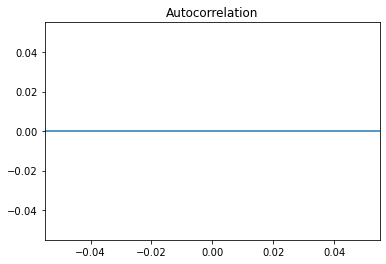

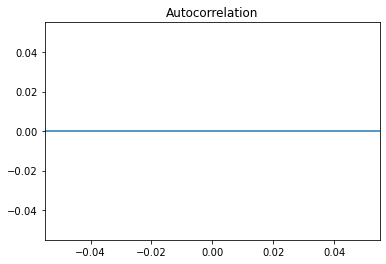

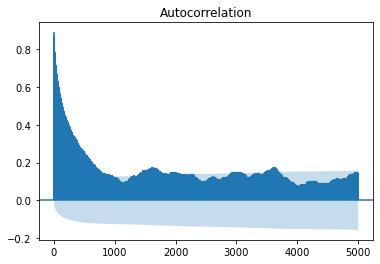

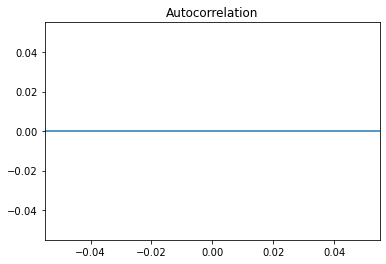

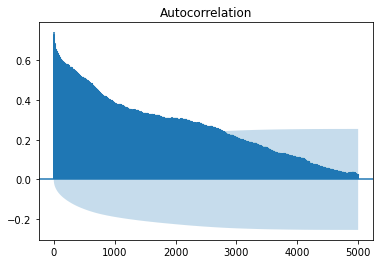

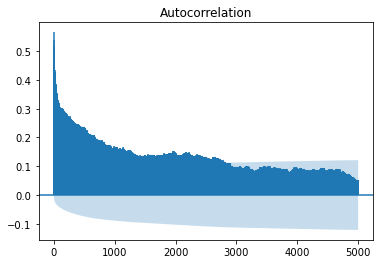

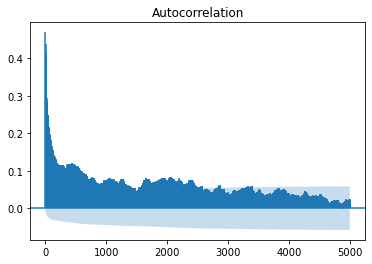

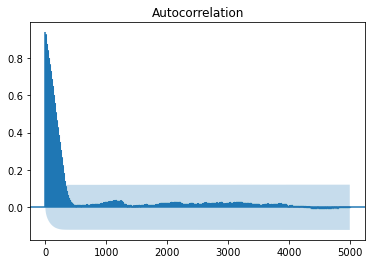

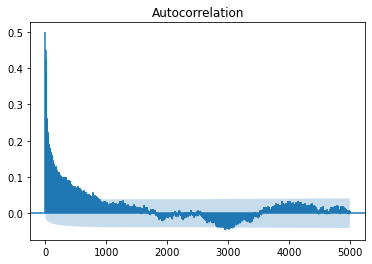

In [36]:
# fig, axes = plt.subplots(5, 1, figsize=(9, 9))

# axes = axes.ravel()
for i in range(0,len(igbffs)):
    plot_acf(df_total.loc[df_total["igbff"] == igbffs[i], 'Helicity (%)'], lags=5000, markersize=.05, zero=False)

